In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd
import os
import gzip
import numpy as np

In [3]:
file_path = '/content/drive/MyDrive/Colab Notebooks/SENG 474/Assignment2/Assignment2/DATA/fashion-mnist/data/fashion'

In [4]:
def load_mnist(path, kind='train'):


    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [5]:
x_train, y_train = load_mnist(file_path, kind='train')
x_test, y_test = load_mnist(file_path, kind='t10k')

In [6]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [7]:
print(x_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0
   0   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   3   0
  36 136 127  62  54   0   0   0   1   3   4   0   0   3   0   0   0   0
   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0
   0   0   0  12  10   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15   0   0
   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163
 127 121 122 146 141  88 172  66   0   0   0   0   0   0   0   0   0   1
   1   1   0 200 232 232 233 229 223 223 215 213 16

In [8]:
#normalize
#might be worth having [-1, 1] and [0,1]
x_train = x_train / 255.0
x_test = x_test / 255.0

In [9]:
print(x_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.00392157 0.         0.         0.05098039 0.28627451 

In [71]:
from sklearn.svm import SVC
#except here c is alpha???? no dont think so

x_train = x_train[:400]
y_train = y_train[:400]

x_validation = x_train[::2]
y_validation = y_train[::2]

In [72]:
print(x_train.shape)
print(y_train.shape)
print(x_validation.shape)
print(y_validation.shape)

(400, 784)
(400,)
(200, 784)
(200,)


rbf: exp(-gamma || x - xprime||^2)
where gamma must be greater than 0

In [73]:
svm = SVC(kernel='rbf', C=1.0)
svm.fit(x_train, y_train)

SVC()

In [74]:
import math

LOG SPACING IM PRETTY SURE

In [101]:
c_list = []
c_zero = 2
b = 2
for i in range(1,10):
  c_list.append(c_zero ** (b*i))

In [102]:
print(c_list)

[4, 16, 64, 256, 1024, 4096, 16384, 65536, 262144]


In [106]:
c_value_list = [2,5,10,20,50,75,100,200,500]

c_value_list = c_list
#C0 > 0 and b > 1
#so c0 at 0.001
#then b starts at 2 and goes

c_loss_train_list = []
c_loss_test_list = []

for c in c_value_list:
  new_c = 1/(c)
  #new_c = math.log(c)

  svm = SVC(kernel='linear', C=new_c)
  svm.fit(x_train, y_train)
  c_loss_train_list.append(1-svm.score(x_train, y_train))
  c_loss_test_list.append(1-svm.score(x_validation, y_validation))

In [107]:
import matplotlib.pyplot as plt

In [108]:
print(c_loss_train_list)
print(c_loss_test_list)

[0.8875, 0.8875, 0.8875, 0.8875, 0.8875, 0.8875, 0.8875, 0.8875, 0.8875]
[0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87]


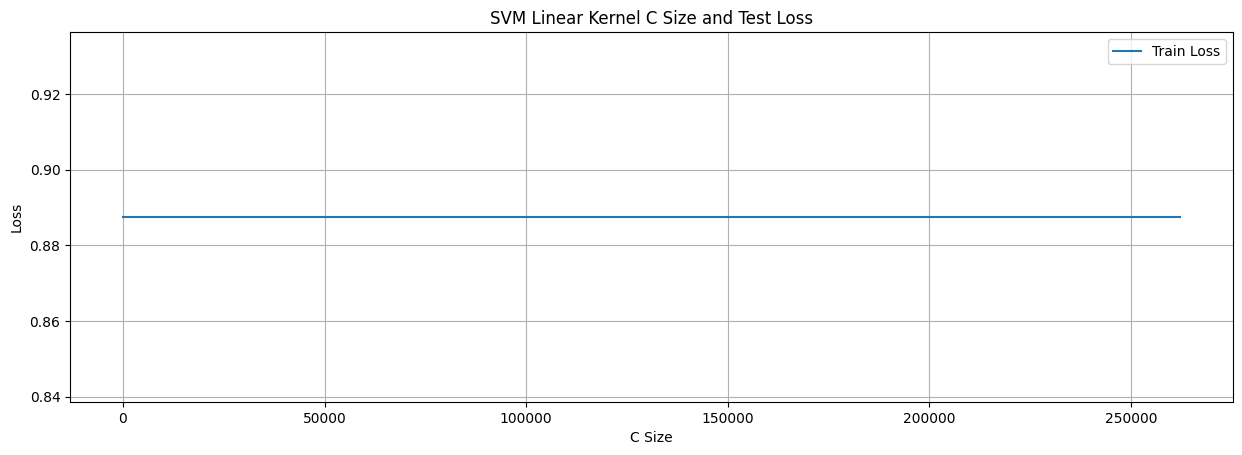

In [109]:
plt.figure().set_figwidth(15)
plt.grid(True)

plt.xlabel("C Size")
plt.ylabel("Loss")
plt.title("SVM Linear Kernel C Size and Test Loss")

plt.plot(c_value_list, c_loss_train_list, label="Train Loss")

plt.legend()
plt.show()

stochastic gradient descent svm from sklearn uses kernels: C where C * sum(1 to n) of margin function (y<w,xi> + b)/||W|| ->kind of
But sklearn uses alpha as a kernel C = 1/(alpha * n)

In [110]:
print(svm.score(x_test, y_test))

0.1


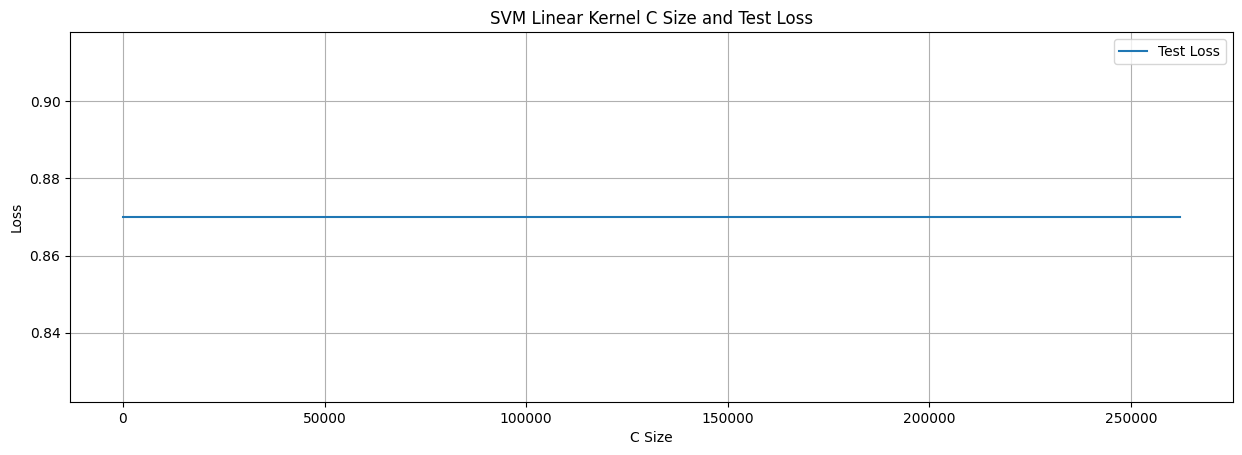

In [111]:
plt.figure().set_figwidth(15)
plt.grid(True)

plt.xlabel("C Size")
plt.ylabel("Loss")
plt.title("SVM Linear Kernel C Size and Test Loss")

plt.plot(c_value_list, c_loss_test_list, label="Test Loss")

plt.legend()
plt.show()